<a href="https://colab.research.google.com/github/ngochif/fngochi_64061/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment II. Training a Convolution Neural Network**

I. **Training a simple model with little data**

Set up Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Preparing the Data

In [3]:
import os
import shutil
import random
import pathlib

# Define the original directory and base directory
original_dir = "/content/drive/MyDrive/dogs-vs-cats/train"
new_base_dir = pathlib.Path("cats_vs_dogs_small")

# Function to create a random subset
def make_subset(subset_name, num_images):
    # Create directories for the subset
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)

    # Get a list of file names for cats and dogs
    cat_files = [filename for filename in os.listdir(original_dir) if filename.startswith("cat")]
    dog_files = [filename for filename in os.listdir(original_dir) if filename.startswith("dog")]

    # Shuffle the file names to ensure randomness
    random.shuffle(cat_files)
    random.shuffle(dog_files)

    # Select a random sample of file names for each category
    selected_cat_files = cat_files[:num_images]
    selected_dog_files = dog_files[:num_images]

    # Copy the selected files to the corresponding directories
    for filename in selected_cat_files:
        src = os.path.join(original_dir, filename)
        dst = new_base_dir / subset_name / "cat" / filename
        shutil.copyfile(src, dst)

    for filename in selected_dog_files:
        src = os.path.join(original_dir, filename)
        dst = new_base_dir / subset_name / "dog" / filename
        shutil.copyfile(src, dst)

# Create balanced subsets with 500, 250 and 250 items from each class
make_subset("train", 500)#Gives 1000 in total
make_subset("validation", 250)#Gives 500 total
make_subset("test", 250)#Gives 500 total

Building the Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs=keras.Input(shape=(180,180,3))
x=layers.Rescaling(1./255)(inputs)
x=layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x=layers.Flatten()(x)
outputs=layers.Dense(1, activation="sigmoid")(x)
model=keras.Model(inputs=inputs, outputs=outputs)
model.summary()

In [5]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

Data Preprocessing

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Fitting the model

In [8]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
32/32 [==============================] - 135s 4s/step - loss: 0.7047 - accuracy: 0.5040 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 131s 4s/step - loss: 0.6935 - accuracy: 0.5480 - val_loss: 0.6873 - val_accuracy: 0.5160
Epoch 3/30
32/32 [==============================] - 133s 4s/step - loss: 0.6896 - accuracy: 0.5570 - val_loss: 0.6778 - val_accuracy: 0.5600
Epoch 4/30
32/32 [==============================] - 141s 4s/step - loss: 0.6803 - accuracy: 0.5780 - val_loss: 0.6800 - val_accuracy: 0.5640
Epoch 5/30
32/32 [==============================] - 143s 4s/step - loss: 0.6572 - accuracy: 0.6090 - val_loss: 0.6761 - val_accuracy: 0.5140
Epoch 6/30
32/32 [==============================] - 133s 4s/step - loss: 0.6450 - accuracy: 0.6170 - val_loss: 0.6694 - val_accuracy: 0.5980
Epoch 7/30
32/32 [==============================] - 132s 4s/step - loss: 0.6159 - accuracy: 0.6570 - val_loss: 0.7163 - val_accuracy: 0.5860
Epoch 8/30
32

Plot Model Results

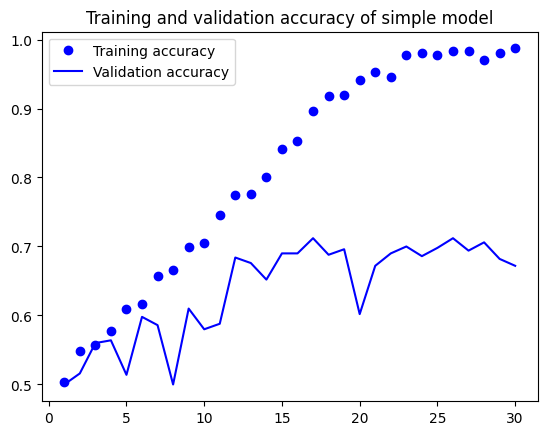

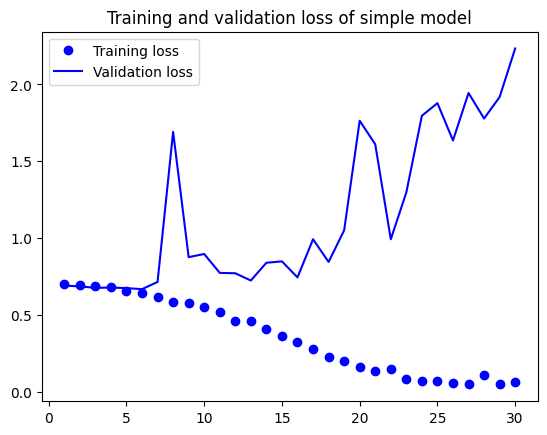

In [10]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy of simple model")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss of simple model")
plt.legend()
plt.show()

Evaluating accuracy on test set

In [13]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 14s 788ms/step - loss: 0.6440 - accuracy: 0.6380
Test accuracy: 0.638


**Training an improved model using same little amount of data**

Data augmentation and dropout

In [15]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Training improved model

In [16]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
32/32 [==============================] - 114s 3s/step - loss: 0.6982 - accuracy: 0.5070 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 112s 3s/step - loss: 0.6930 - accuracy: 0.5090 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 110s 3s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 101s 3s/step - loss: 0.6947 - accuracy: 0.5110 - val_loss: 0.6921 - val_accuracy: 0.5080
Epoch 5/100
32/32 [==============================] - 109s 3s/step - loss: 0.7004 - accuracy: 0.4940 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 110s 3s/step - loss: 0.6907 - accuracy: 0.5240 - val_loss: 0.6903 - val_accuracy: 0.5140
Epoch 7/100
32/32 [==============================] - 109s 3s/step - loss: 0.6909 - accuracy: 0.5560 - val_loss: 0.6867 - val_accuracy: 0.5080
Epoch 

Plotting improved model

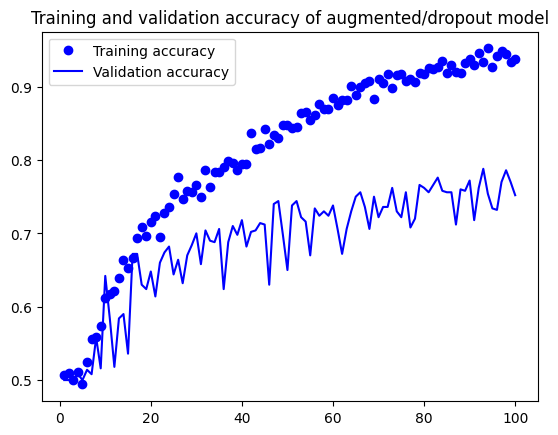

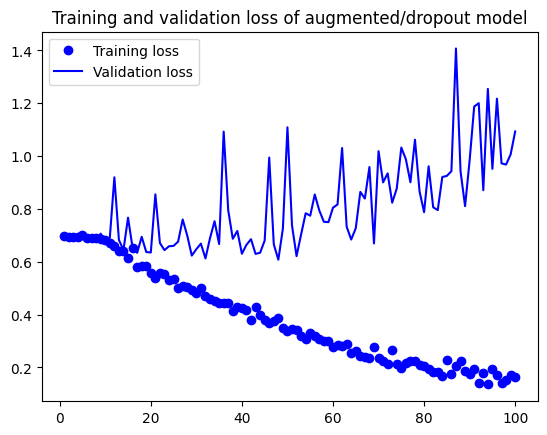

In [17]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy of augmented/dropout model")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss of augmented/dropout model")
plt.legend()
plt.show()

Performance of improved model on test set

In [18]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 12s 716ms/step - loss: 0.5639 - accuracy: 0.7340
Test accuracy: 0.734


**Training a model on a larger dataset**

Creating a larger dataset

In [7]:
# Increase train set to 1000 of each class while maintaining 250 of each class for validation and test
make_subset("train_larger", 1000)#Gives 2000 elements
make_subset("validation", 250)#Gives 500 elements
make_subset("test", 250)#Gives 500 elements


In [8]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset_larger = image_dataset_from_directory(
    new_base_dir / "train_larger",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_larger = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset_larger = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Building Model with larger training set

In [17]:
inputs=keras.Input(shape=(180,180,3))
x=layers.Rescaling(1./255)(inputs)
x=layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x=layers.Flatten()(x)
outputs=layers.Dense(1, activation="sigmoid")(x)
model=keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [18]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

Training on larger dataset

In [20]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_larger.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset_larger,
    epochs=30,
    validation_data=validation_dataset_larger,
    callbacks=callbacks)

Epoch 1/30
121/121 [==============================] - 330s 3s/step - loss: 0.7074 - accuracy: 0.5098 - val_loss: 0.6911 - val_accuracy: 0.6800
Epoch 2/30
121/121 [==============================] - 330s 3s/step - loss: 0.6862 - accuracy: 0.5640 - val_loss: 0.6388 - val_accuracy: 0.6520
Epoch 3/30
121/121 [==============================] - 330s 3s/step - loss: 0.6348 - accuracy: 0.6368 - val_loss: 0.5847 - val_accuracy: 0.6820
Epoch 4/30
121/121 [==============================] - 331s 3s/step - loss: 0.6025 - accuracy: 0.6780 - val_loss: 0.6089 - val_accuracy: 0.6540
Epoch 5/30
121/121 [==============================] - 332s 3s/step - loss: 0.5698 - accuracy: 0.7070 - val_loss: 0.5979 - val_accuracy: 0.6920
Epoch 6/30
121/121 [==============================] - 328s 3s/step - loss: 0.5370 - accuracy: 0.7241 - val_loss: 0.5571 - val_accuracy: 0.7360
Epoch 7/30
121/121 [==============================] - 328s 3s/step - loss: 0.4992 - accuracy: 0.7534 - val_loss: 0.6430 - val_accuracy: 0.7060

Plotting results of model trained on larger dataset

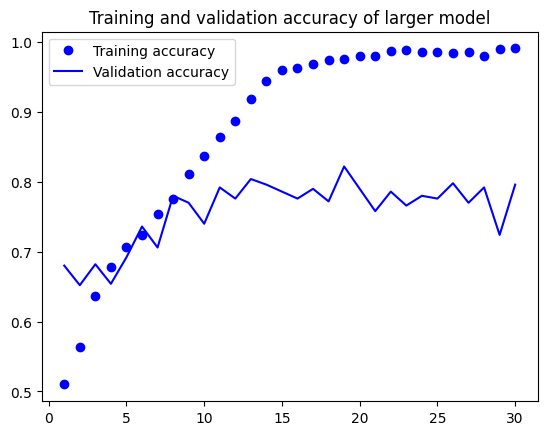

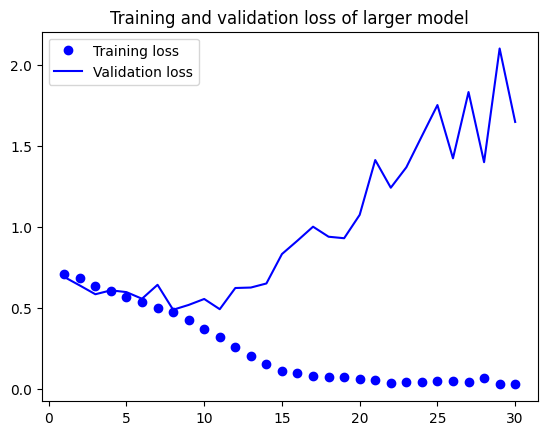

In [22]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy of larger model")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss of larger model")
plt.legend()
plt.show()

Performance of model on test set

In [25]:
test_model = keras.models.load_model("convnet_from_scratch_larger.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_larger)
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 13s 712ms/step - loss: 0.5352 - accuracy: 0.7340
Test accuracy: 0.734


**Improving the model trained on a larger training set**

Data augmentation and dropout

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Training improved model with larger dataset

In [10]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_large_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset_larger,
    epochs=100,
    validation_data=validation_dataset_larger,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 187s 3s/step - loss: 0.6960 - accuracy: 0.5165 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 163s 3s/step - loss: 0.6941 - accuracy: 0.5045 - val_loss: 0.7233 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 173s 3s/step - loss: 0.6917 - accuracy: 0.5280 - val_loss: 0.6917 - val_accuracy: 0.5020
Epoch 4/100
63/63 [==============================] - 164s 3s/step - loss: 0.6921 - accuracy: 0.5155 - val_loss: 0.6916 - val_accuracy: 0.4980
Epoch 5/100
63/63 [==============================] - 162s 3s/step - loss: 0.6901 - accuracy: 0.5630 - val_loss: 0.6860 - val_accuracy: 0.5160
Epoch 6/100
63/63 [==============================] - 173s 3s/step - loss: 0.6778 - accuracy: 0.5980 - val_loss: 0.6623 - val_accuracy: 0.6640
Epoch 7/100
63/63 [==============================] - 162s 3s/step - loss: 0.6503 - accuracy: 0.6260 - val_loss: 0.6312 - val_accuracy: 0.6760
Epoch 

Plotting improved model performance metrics

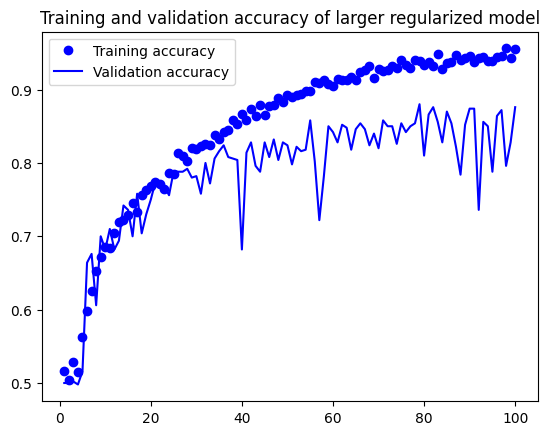

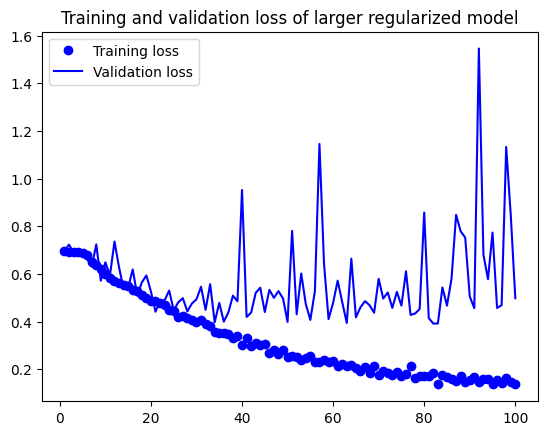

In [11]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy of larger regularized model")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss of larger regularized model")
plt.legend()
plt.show()

Assessing performance of improved model on test set

In [12]:
test_model = keras.models.load_model("convnet_from_scratch_large_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_larger)
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 12s 686ms/step - loss: 0.4072 - accuracy: 0.8780
Test accuracy: 0.878


**Using a Pretrained Model on a small dataset**

Instantiating the Convolution Base

In [7]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

Feature Extraction

In [9]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 7s 7s/step


In [10]:
train_features.shape

(1000, 5, 5, 512)

Defining and training the densely connected classifier

In [11]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
32/32 [==============================] - 3s 67ms/step - loss: 28.0810 - accuracy: 0.8890 - val_loss: 5.5777 - val_accuracy: 0.9600
Epoch 2/20
32/32 [==============================] - 1s 41ms/step - loss: 3.5758 - accuracy: 0.9690 - val_loss: 4.1681 - val_accuracy: 0.9760
Epoch 3/20
32/32 [==============================] - 1s 34ms/step - loss: 1.6117 - accuracy: 0.9840 - val_loss: 4.6045 - val_accuracy: 0.9820
Epoch 4/20
32/32 [==============================] - 1s 35ms/step - loss: 2.6681 - accuracy: 0.9790 - val_loss: 8.0368 - val_accuracy: 0.9620
Epoch 5/20
32/32 [==============================] - 1s 36ms/step - loss: 2.3034 - accuracy: 0.9880 - val_loss: 5.7631 - val_accuracy: 0.9720
Epoch 6/20
32/32 [==============================] - 1s 35ms/step - loss: 1.7329e-07 - accuracy: 1.0000 - val_loss: 5.7504 - val_accuracy: 0.9720
Epoch 7/20
32/32 [==============================] - 1s 35ms/step - loss: 0.1775 - accuracy: 0.9970 - val_loss: 5.7061 - val_accuracy: 0.9720
Epoch 8/

Plotting results for pretrained model

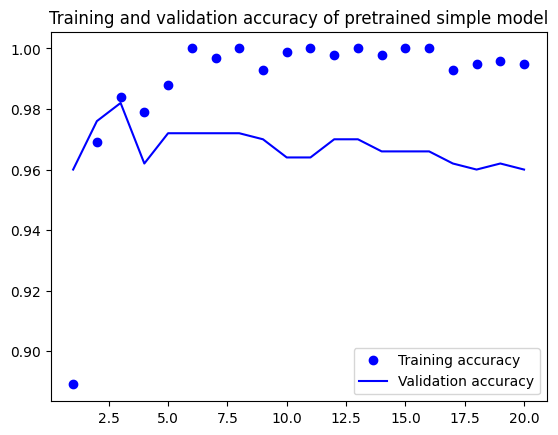

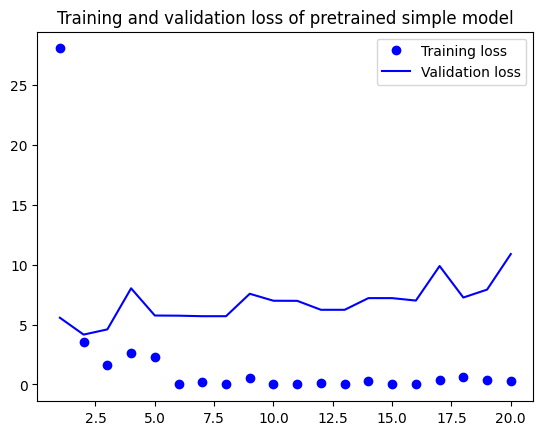

In [12]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy of pretrained simple model")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss of pretrained simple model")
plt.legend()
plt.show()

Evaluating the model on the test set

In [14]:
model = keras.models.load_model("feature_extraction.keras")
test_loss, test_accuracy = model.evaluate(test_features, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

16/16 [==============================] - 0s 8ms/step - loss: 2.3336 - accuracy: 0.9700
Test Loss: 2.3335695266723633
Test Accuracy: 0.9700000286102295


**Improving a pretrained model through data augmentation**

Instantiating Model

In [5]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


Adding Data Augmentation and Classifier

In [6]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
import tensorflow as tf
from tensorflow import keras
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

***I couldn't use a pretrained model with augmentation due to connection issues. As mentioned in my email, connection has been unsteady from this part of Africa. Using an augmented pretrained model is computationally expensive. However, the literature suggests that this would only bring a modest improvement. Mindful of deadlines, I decided to stop at this step rather than keep insisting. I am not sure I would have succeeded to train it in my context, whereas the literature says even if I had succeeded, the improvements would be meagre***